In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [74]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [8]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


STEP 2- DATA CLEANING

In [15]:
df.duplicated().sum()

0

In [17]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

In [23]:
df['Order Year'] = df['Order Date'].dt.year.astype('Int64')

In [25]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,2016


DROPPING THE COLUMNS

In [27]:
cols = ['Order ID', 'Customer Name', 'Order Date', 'State']

In [29]:
df.drop(cols, axis = 1, inplace = True)
df.head()

,Category,Sub Category,City,Region,Sales,Discount,Profit,Order Year
0,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,2017
1,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,2017
2,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,2017
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,2016
4,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,2016


STEP 3- EXPLORATORY DATA ANALYSIS

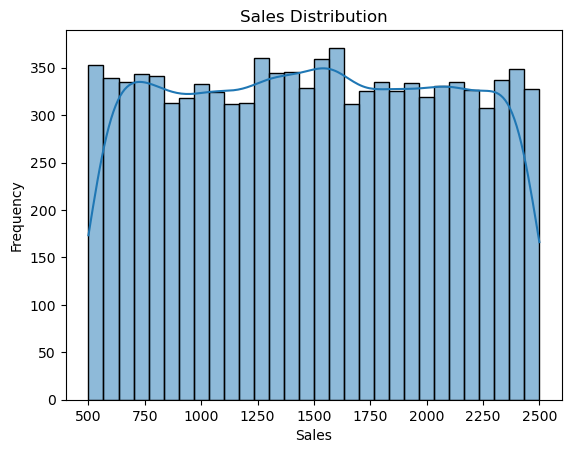

In [31]:
#Understanding overall Sales distribution using Seaborn
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

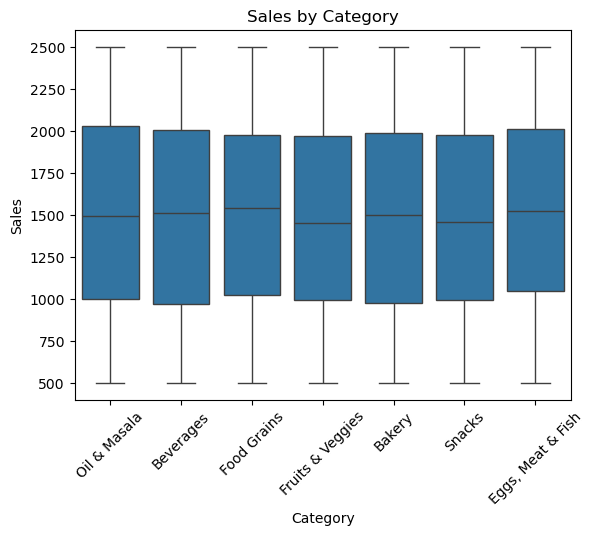

In [27]:
#Sales by Category
sns.boxplot(data=df, x='Category', y='Sales')
plt.title('Sales by Category')
plt.xticks(rotation=45)
plt.show()

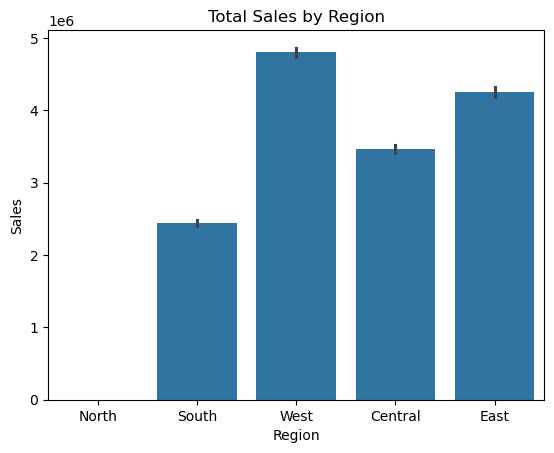

In [29]:
#Sales by region
sns.barplot(data=df, x='Region', y='Sales', estimator=sum)
plt.title('Total Sales by Region')
plt.show()

STEP 4- DATA PREPROCESSING

LABEL ENCODING FOR CATEGORICAL COLUMNS

In [33]:
cat_cols = ['Category', 'Sub Category', 'City', 'Region']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

STEP 5- MODEL TRAINING

In [35]:
#Defining features and Targets
X = df.drop('Sales', axis=1)  # Features
y = df['Sales']               # Target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X.dtypes

Category          int32
Sub Category      int32
City              int32
Region            int32
Discount        float64
Profit          float64
Order Year        Int64
dtype: object

In [41]:
print(y_train.dtypes)
print(y_train.head())

int64
4100     789
2586    1757
9194    1032
2002     852
7225    1617
Name: Sales, dtype: int64


STEP 6-MODEL EVALUATION

In [43]:
# Make sure no NaNs exist
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset index to avoid misalignment
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [45]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 212768.60666831376
R² Score: 0.35488813359885707


STEP 7- ADDING MULTIPLE MODELS

7.1 Adding Random Forest and XGBoost

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R² Score": r2})

results_df = pd.DataFrame(results)
print(results_df)

               Model            MSE  R² Score
0  Linear Regression  212768.606668  0.354888
1      Random Forest  225436.301059  0.316480
2            XGBoost  253271.814084  0.232083


7.2 Feature Importance

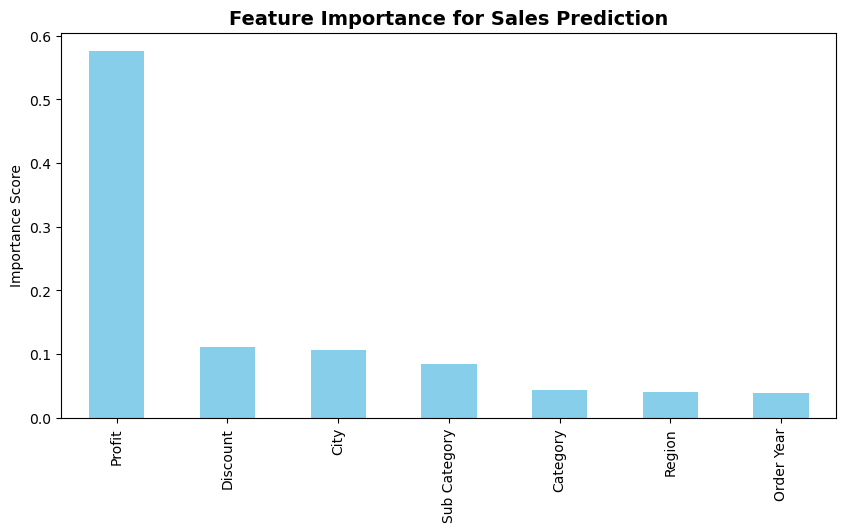

In [50]:
# Using Random Forest for feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Feature Importance for Sales Prediction", fontsize=14, fontweight='bold')
plt.ylabel("Importance Score")
plt.show()

7.3 Residual Destribution

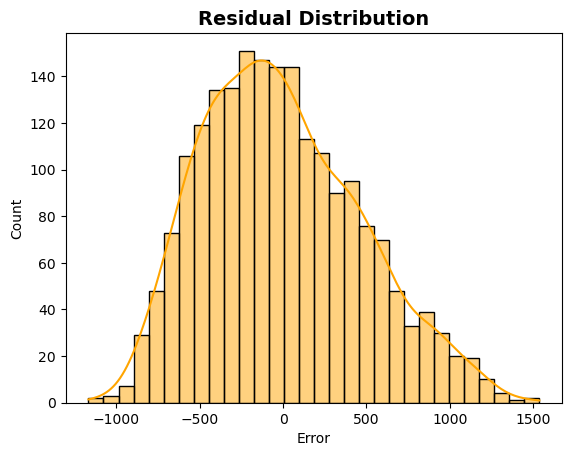

In [52]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title("Residual Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Error")
plt.show()

7.4 Prediction vs Actual Plot

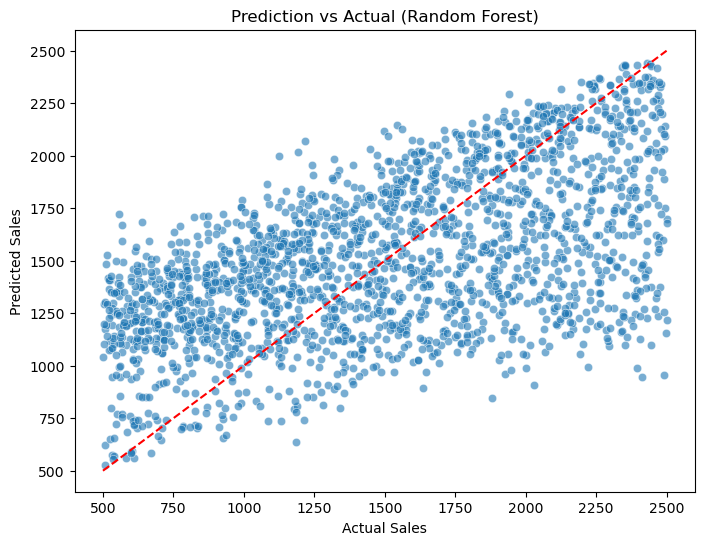

In [70]:
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Prediction vs Actual (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.show()

7.5 K-Fold Cross Validation on Random Forest

In [77]:
# k-fold cross-validation with R² score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print("Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", np.mean(cv_scores))

Cross-Validation R2 Scores: [0.32773752 0.33015191 0.31807681 0.32621164 0.35093839]
Average R2 Score: 0.3306232559565845


STEP 8- CONCLUSION

In this project, we analyzed Supermart Grocery Sales data to understand key factors influencing sales and to build predictive models. After data cleaning, exploratory analysis, and preprocessing, we trained multiple models including Random Forest and XGBoost. Model performance was evaluated using metrics such as R², MAE, and RMSE, along with residual analysis and cross-validation. Random Forest emerged as the best-performing model with consistent results across folds. Feature importance analysis revealed the most significant variables impacting sales, providing actionable insights for business decision-making. This project demonstrates the complete workflow of a regression task, from raw data to model validation.